In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [157]:
data = pd.read_csv('data.txt', sep=',', header=None)
data.columns = ['ftq', 'room', 'price']

In [162]:
data2 = pd.read_csv('data2.txt', sep=',', header=None)
data2.columns = ['ftq', 'room', 'floor', 'age', 'price']

In [163]:
data2

,ftq,room,floor,age,price
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0
...,...,...,...,...,...
95,1224.0,2.0,2.0,12.0,329.0
96,1432.0,2.0,1.0,43.0,388.0
97,1660.0,3.0,2.0,19.0,390.0
98,1212.0,3.0,1.0,20.0,356.0


In [9]:
data.head()

,ftq,room,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [10]:
def linalg_solve(A,B):
    return np.dot(np.linalg.inv(A),B)

In [12]:
A = np.matrix([[2,1,-1],[1,3,2],[3,-2,1]])
B = np.matrix([[3],[4],[-5]])

In [13]:
linalg_solve(A,B)

matrix([[ 3.05311332e-16],
        [ 2.00000000e+00],
        [-1.00000000e+00]])

In [19]:
data[['ftq','room']].head()

,ftq,room
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [22]:
data.price.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: price, dtype: int64

In [24]:
data.price.sum()

15999395

In [32]:
data[['ftq','room']].sum()

ftq     94032
room      149
dtype: int64

In [46]:
data[['ftq','room']]['ftq']

0     2104
1     1600
2     2400
3     1416
4     3000
5     1985
6     1534
7     1427
8     1380
9     1494
10    1940
11    2000
12    1890
13    4478
14    1268
15    2300
16    1320
17    1236
18    2609
19    3031
20    1767
21    1888
22    1604
23    1962
24    3890
25    1100
26    1458
27    2526
28    2200
29    2637
30    1839
31    1000
32    2040
33    3137
34    1811
35    1437
36    1239
37    2132
38    4215
39    2162
40    1664
41    2238
42    2567
43    1200
44     852
45    1852
46    1203
Name: ftq, dtype: int64

In [47]:
np.dot(data[['ftq','room']]['ftq'],data[['ftq','room']]['ftq'])

217179406

In [48]:
len(data[['ftq','room']]['ftq'])

47

In [185]:
def ajuste_mult(x_treino1,x_treino2,y_treino):
    
    sx1  = x_treino1.sum()
    sx2  = x_treino2.sum()
    sy   = y_treino.sum()
    sx1x2= np.dot(x_treino1,x_treino2)
    sx1x1= np.dot(x_treino1,x_treino1)
    sx2x2= np.dot(x_treino2,x_treino2)
    syx1 = np.dot(y_treino,x_treino1)
    syx2 = np.dot(y_treino,x_treino2)
    N    = len(y_treino)
    
    A = ([[sx1x1,sx1x2,sx1],[sx1x2,sx2x2,sx2],[sx1,sx2,N]])
    B = ([syx1,syx2,sy])
    
    
    return linalg_solve(A,B)

In [187]:
ajuste_mult(data.ftq,data.room,data.price)

array([  139.21067402, -8738.01911233, 89597.9095428 ])

In [180]:
def prev(x_treino1,x_treino2,y_treino,x1 = 'ftq',x2 = 'room'):
    a1 = float(ajuste_mult(x_treino1,x_treino2,y_treino)[0])
    a2 = float(ajuste_mult(x_treino1,x_treino2,y_treino)[1])
    b = float(ajuste_mult(x_treino1,x_treino2,y_treino)[2])

    
    return a1*x1 + a2*x2 + b

In [186]:
prev(data.ftq,data.room,data.price,'ftq'==1000,'room'==2)

89597.90954279806

In [193]:
a1 = float(ajuste_mult(data.ftq,data.room,data.price)[0])
a2 = float(ajuste_mult(data.ftq,data.room,data.price)[1])
b = float(ajuste_mult(data.ftq,data.room,data.price)[2])

(0.0, 450000.0)

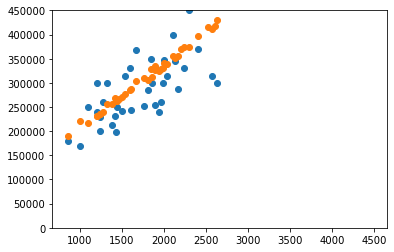

In [210]:
previstos = []

for i in range(0,len(data.room)):
    previstos.append(data.ftq[i]*a1 + data.room[i]*a2 + b)


plt.plot(data.ftq,data.price,'o')
plt.plot(data.ftq,previstos,'o')
plt.ylim(0,450000)

(0.0, 450000.0)

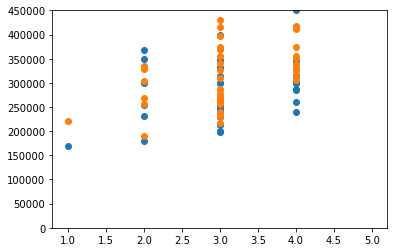

In [211]:
previstos = []

for i in range(0,len(data.room)):
    previstos.append(data.ftq[i]*a1 + data.room[i]*a2 + b)


plt.plot(data.room,data.price,'o')
plt.plot(data.room,previstos,'o')
plt.ylim(0,450000)

In [218]:
erro = np.absolute(data.price-previstos)/data.price

In [219]:
erro

0     0.109069
1     0.132704
2     0.077207
3     0.160535
4     0.125249
5     0.103631
6     0.120568
7     0.316778
8     0.205163
9     0.119029
10    0.352983
11    0.014971
12    0.010627
13    0.043730
14    0.076941
15    0.166858
16    0.146782
17    0.177830
18    0.164304
19    0.204352
20    0.223286
21    0.313536
22    0.180230
23    0.261167
24    0.054040
25    0.133591
26    0.426581
27    0.115075
28    0.221795
29    0.435420
30    0.062217
31    0.295295
32    0.075375
33    0.137631
34    0.072950
35    0.054140
36    0.025950
37    0.018675
38    0.168340
39    0.239092
40    0.175662
41    0.136518
42    0.312101
43    0.229309
44    0.060197
45    0.041894
46    0.036099
Name: price, dtype: float64

In [220]:
np.mean(erro)

0.15607399762704716